In [1]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df_model = pd.read_csv("../../raw_data/master_data_train.csv")

In [2]:
from market_value_predictor.preproc import manual_encoding

manual_encoding(df_model,"player_positions")

In [3]:
print(df_model.columns.tolist())


['Unnamed: 0', 'fee_cleaned', 'age', 'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name', 'league_rank', 'overall', 'potential', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_in

df_model.drop('height_cm', axis=1, inplace=True)
df_model.drop('weight_kg', axis=1, inplace=True)
df_model.drop('nationality', axis=1, inplace=True)
df_model.drop('fifa year', axis=1, inplace=True)
df_model.drop('preferred_foot', axis=1, inplace=True)
df_model.drop('on_loan', axis=1, inplace=True)

In [4]:
df_model=df_model[["fee_cleaned","age","overall","potential","wage_eur","player_positions","release_clause_eur","remaining_seasons_on_contract","team_position"]]

In [5]:
df_model["age"]

0       19
1       18
2       18
3       27
4       24
        ..
3127    24
3128    26
3129    22
3130    19
3131    28
Name: age, Length: 3132, dtype: int64

In [6]:
df_model

,fee_cleaned,age,overall,potential,wage_eur,player_positions,release_clause_eur,remaining_seasons_on_contract,team_position
0,4.50,19,63,77,2000,"LB, LM",1500000.0,3.0,LCM
1,4.50,18,67,83,6000,CB,3600000.0,1.0,RES
2,5.72,18,58,78,650,CB,625000.0,4.0,SUB
3,8.10,27,80,81,60000,ST,27600000.0,1.0,ST
4,0.90,24,74,79,30000,"LW, RW",14800000.0,2.0,SUB
...,...,...,...,...,...,...,...,...,...
3127,3.15,24,76,80,30000,"CAM, LM",NaN,0.0,SUB
3128,1.80,26,70,72,40000,"ST, LW",NaN,3.0,ST
3129,0.45,22,75,84,9000,"RW, LW",24200000.0,3.0,RW
3130,6.30,19,68,86,15000,ST,4900000.0,2.0,SUB


In [7]:
bins = [10,20,22,25,29,45, np.inf]
names = ['less desirable', 'desirable', 'highly desirable', 'desirable2', 'less desirable2','sd']

df_model['age'] = pd.cut(df_model['age'], bins, labels=names)

df_model

df_model['age'] = df_model['age'].apply(lambda x: 'desirable' if x == 'desirable2' else x)
df_model['age'] = df_model['age'].apply(lambda x: 'less desirable' if x == 'less desirable2' else x)


In [8]:
df_model["potencial"]=df_model["potential"]-df_model["overall"]
df_model.drop('potential', axis=1, inplace=True)

bins = [-1,5,10,20, np.inf]
names = ['low potential', 'good potential', 'high potential', 'very high potential']

df_model['potencial'] = pd.cut(df_model['potencial'], bins, labels=names)

In [9]:
df_model

,fee_cleaned,age,overall,wage_eur,player_positions,release_clause_eur,remaining_seasons_on_contract,team_position,potencial
0,4.50,less desirable,63,2000,"LB, LM",1500000.0,3.0,LCM,high potential
1,4.50,less desirable,67,6000,CB,3600000.0,1.0,RES,high potential
2,5.72,less desirable,58,650,CB,625000.0,4.0,SUB,high potential
3,8.10,desirable,80,60000,ST,27600000.0,1.0,ST,low potential
4,0.90,highly desirable,74,30000,"LW, RW",14800000.0,2.0,SUB,low potential
...,...,...,...,...,...,...,...,...,...
3127,3.15,highly desirable,76,30000,"CAM, LM",NaN,0.0,SUB,low potential
3128,1.80,desirable,70,40000,"ST, LW",NaN,3.0,ST,low potential
3129,0.45,desirable,75,9000,"RW, LW",24200000.0,3.0,RW,good potential
3130,6.30,less desirable,68,15000,ST,4900000.0,2.0,SUB,high potential


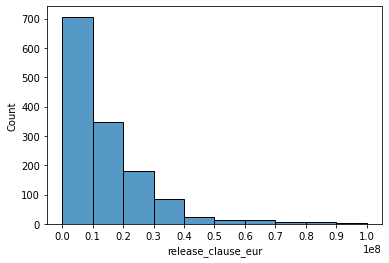

In [10]:
ax = sns.histplot(df_model, x='release_clause_eur', bins=[0,10000000,20000000,30000000,40000000,50000000,60000000,70000000,80000000,90000000,100000000])
ax.set_xticks([0,10000000,20000000,30000000,40000000,50000000,60000000,70000000,80000000,90000000,100000000])

In [11]:
bins = [-1,20000001,np.inf]
names = ['under_20M', 'over_20M']

df_model['release_clause_eur'] = pd.cut(df_model['release_clause_eur'], bins, labels=names)

In [12]:
df_model[['release_clause_eur']] = df_model[['release_clause_eur']].applymap(lambda x: "None" if pd.isnull(x) else x)

In [13]:
df_model.release_clause_eur.value_counts()

None         1746
under_20M    1061
over_20M      325
Name: release_clause_eur, dtype: int64

In [14]:
df_model

,fee_cleaned,age,overall,wage_eur,player_positions,release_clause_eur,remaining_seasons_on_contract,team_position,potencial
0,4.50,less desirable,63,2000,"LB, LM",under_20M,3.0,LCM,high potential
1,4.50,less desirable,67,6000,CB,under_20M,1.0,RES,high potential
2,5.72,less desirable,58,650,CB,under_20M,4.0,SUB,high potential
3,8.10,desirable,80,60000,ST,over_20M,1.0,ST,low potential
4,0.90,highly desirable,74,30000,"LW, RW",under_20M,2.0,SUB,low potential
...,...,...,...,...,...,...,...,...,...
3127,3.15,highly desirable,76,30000,"CAM, LM",None,0.0,SUB,low potential
3128,1.80,desirable,70,40000,"ST, LW",None,3.0,ST,low potential
3129,0.45,desirable,75,9000,"RW, LW",over_20M,3.0,RW,good potential
3130,6.30,less desirable,68,15000,ST,under_20M,2.0,SUB,high potential


/home/ricardo/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ricardo/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 13., 768., 831., 775., 493., 188.,  31.,  13.,   0.,   1.]),
 array([-1. , -0.1,  0.8,  1.7,  2.6,  3.5,  4.4,  5.3,  6.2,  7.1,  8. ]),
 <BarContainer object of 10 artists>)

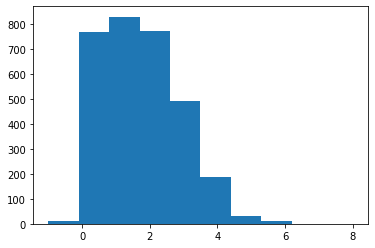

In [15]:
plt.hist(df_model["remaining_seasons_on_contract"])

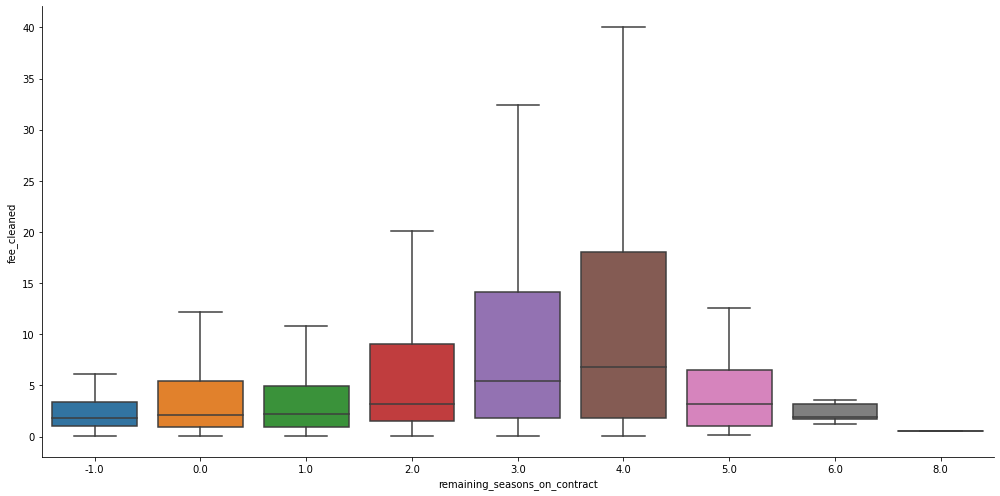

In [16]:
sns.catplot(data=df_model, x='remaining_seasons_on_contract',y='fee_cleaned', kind='box', showfliers=False, height=7,aspect=2)

In [17]:
bins = [-1,2,4,np.inf]
names = ['other', '2-4y','over_4y']

df_model['remaining_seasons_on_contract'] = pd.cut(df_model['remaining_seasons_on_contract'], bins, labels=names)
df_model['remaining_seasons_on_contract'] = df_model['remaining_seasons_on_contract'].apply(lambda x: 'other' if x == 'over_4y' else x)

In [18]:
df_model.remaining_seasons_on_contract.value_counts()

other    2419
2-4y      681
Name: remaining_seasons_on_contract, dtype: int64

In [19]:
df_model

,fee_cleaned,age,overall,wage_eur,player_positions,release_clause_eur,remaining_seasons_on_contract,team_position,potencial
0,4.50,less desirable,63,2000,"LB, LM",under_20M,2-4y,LCM,high potential
1,4.50,less desirable,67,6000,CB,under_20M,other,RES,high potential
2,5.72,less desirable,58,650,CB,under_20M,2-4y,SUB,high potential
3,8.10,desirable,80,60000,ST,over_20M,other,ST,low potential
4,0.90,highly desirable,74,30000,"LW, RW",under_20M,other,SUB,low potential
...,...,...,...,...,...,...,...,...,...
3127,3.15,highly desirable,76,30000,"CAM, LM",None,other,SUB,low potential
3128,1.80,desirable,70,40000,"ST, LW",None,2-4y,ST,low potential
3129,0.45,desirable,75,9000,"RW, LW",over_20M,2-4y,RW,good potential
3130,6.30,less desirable,68,15000,ST,under_20M,other,SUB,high potential


In [20]:
df_model.team_position.value_counts()

SUB    1196
RES     230
ST      149
LCB     141
RCB     132
GK      124
LB      110
RB      105
LM      102
LCM      98
RCM      95
RM       93
CAM      92
RS       65
LS       62
RDM      59
LW       52
RW       49
LDM      45
CDM      35
CM       21
CB       12
RWB      10
RAM       8
LF        6
RF        6
LWB       6
LAM       6
CF        4
Name: team_position, dtype: int64

In [21]:
df_model.player_positions.value_counts()

ST             418
CB             398
GK             198
CDM, CM        150
CM             123
              ... 
RM, LM, CF       1
CDM, CM, LB      1
RB, LB, RW       1
RB, CDM, CM      1
LM, LW, RM       1
Name: player_positions, Length: 348, dtype: int64

In [22]:
positions_dict = {"ST": [0,3],"RS":[0,3],"LS":[0,3],"CF":[0,3],"LF":[1,3],"LW":[1,3],"RF":[-1,3],"RW":[-1,3],
                  "CDM":[0,2],"CM":[0,2],"RCM":[0,2],"LCM":[0,2],"CAM":[0,2],"CDB":[0,2],"LM":[1,2],"LDM":[1,2],"LAM":[1,2],"RM":[-1,2],"RAM":[-1,2],"RDM":[-1,2],
                  "CB":[0,1],"RCB":[0,1],"LCB":[0,1],"LB":[1,1],"LWB":[1,1],"RB":[-1,1],"RWB":[-1,1],
                  "GK":[0,0]}


In [23]:
positions_dict={k:np.array(v) for k,v in positions_dict.items()}

In [24]:
temp=df_model.player_positions.str.split(", ").explode()

In [25]:
temp

0        LB
0        LM
1        CB
2        CB
3        ST
       ... 
3129     RW
3129     LW
3130     ST
3131    CDM
3131     CM
Name: player_positions, Length: 5295, dtype: object

In [26]:
position_list=temp.map(positions_dict).groupby(temp.index).mean()

In [27]:
position_list

0       [1.0, 1.5]
1       [0.0, 1.0]
2       [0.0, 1.0]
3       [0.0, 3.0]
4       [0.0, 3.0]
           ...    
3127    [0.5, 2.0]
3128    [0.5, 3.0]
3129    [0.0, 3.0]
3130    [0.0, 3.0]
3131    [0.0, 2.0]
Name: player_positions, Length: 3132, dtype: object

In [28]:
df_model["x-axis position"]=position_list.apply(lambda x: x[0] )

In [29]:
df_model["y-axis position"]=position_list.apply(lambda x: x[1] )

In [30]:
df_model.drop('team_position', axis=1, inplace=True)
df_model.drop('player_positions', axis=1, inplace=True)

In [31]:
df_model

,fee_cleaned,age,overall,wage_eur,release_clause_eur,remaining_seasons_on_contract,potencial,x-axis position,y-axis position
0,4.50,less desirable,63,2000,under_20M,2-4y,high potential,1.0,1.5
1,4.50,less desirable,67,6000,under_20M,other,high potential,0.0,1.0
2,5.72,less desirable,58,650,under_20M,2-4y,high potential,0.0,1.0
3,8.10,desirable,80,60000,over_20M,other,low potential,0.0,3.0
4,0.90,highly desirable,74,30000,under_20M,other,low potential,0.0,3.0
...,...,...,...,...,...,...,...,...,...
3127,3.15,highly desirable,76,30000,None,other,low potential,0.5,2.0
3128,1.80,desirable,70,40000,None,2-4y,low potential,0.5,3.0
3129,0.45,desirable,75,9000,over_20M,2-4y,good potential,0.0,3.0
3130,6.30,less desirable,68,15000,under_20M,other,high potential,0.0,3.0


In [32]:
df_model.dtypes

fee_cleaned                       float64
age                                object
overall                             int64
wage_eur                            int64
release_clause_eur                 object
remaining_seasons_on_contract      object
potencial                        category
x-axis position                   float64
y-axis position                   float64
dtype: object

In [33]:
X_train=df_model.drop(columns=["fee_cleaned"])

In [34]:
y_train=df_model.fee_cleaned

In [35]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

all_numerics = list(X_train.select_dtypes(include=numerics).columns)
all_numerics

['overall', 'wage_eur', 'x-axis position', 'y-axis position']

In [36]:
categorical=["object","category"]

all_cats = list(X_train.select_dtypes(include=categorical).columns)
all_cats

['age', 'release_clause_eur', 'remaining_seasons_on_contract', 'potencial']

In [37]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config; set_config(display='diagram')
from sklearn.linear_model import LinearRegression, Ridge

In [43]:
num_transformer = make_pipeline(SimpleImputer(), MinMaxScaler()) 
cat_transformer = OneHotEncoder(handle_unknown="ignore") 

preprocessor = ColumnTransformer(
    [("num_tr",num_transformer,all_numerics),
     ("cat_tr",cat_transformer,all_cats)]
    ,remainder="passthrough"
)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_tr',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['overall', 'wage_eur', 'x-axis position',
                                  'y-axis position']),
                                ('cat_tr',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['age', 'release_clause_eur',
                                  'remaining_seasons_on_contract',
                                  'potencial'])])

In [44]:
pipe = make_pipeline(preprocessor, Ridge())

In [45]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_tr',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['overall', 'wage_eur',
                                                   'x-axis position',
                                                   'y-axis position']),
                                                 ('cat_tr',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['age', 'release_clause_eur',
                                                   'remaining_seasons_on_contract',
                                                   'potencial'])])),
                ('ridge', Ridge())])

In [46]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_tr',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['overall', 'wage_eur',
                                                   'x-axis position',
                                                   'y-axis position']),
                                                 ('cat_tr',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['age', 'release_clause_eur',
                                                   'remaining_seasons_on_contract',
                                                   'potencial'])])),
                ('ridge', Ridge())])

In [47]:
from sklearn.model_selection import cross_val_score

cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2').mean()

0.2799652101010876